In [1]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Return to the origin


For a *finite* random walk of (large) length $n$, it is known that the expected number of returns to the origin $T_n$ scales like follows:
$$
\left\langle T_n \right\rangle \sim \left\{
\begin{array}{ll}
\sqrt{n} & d=1 \\
\log(n) & d=2 \\
C_d & d\geq 3
\end{array}
\right.
$$


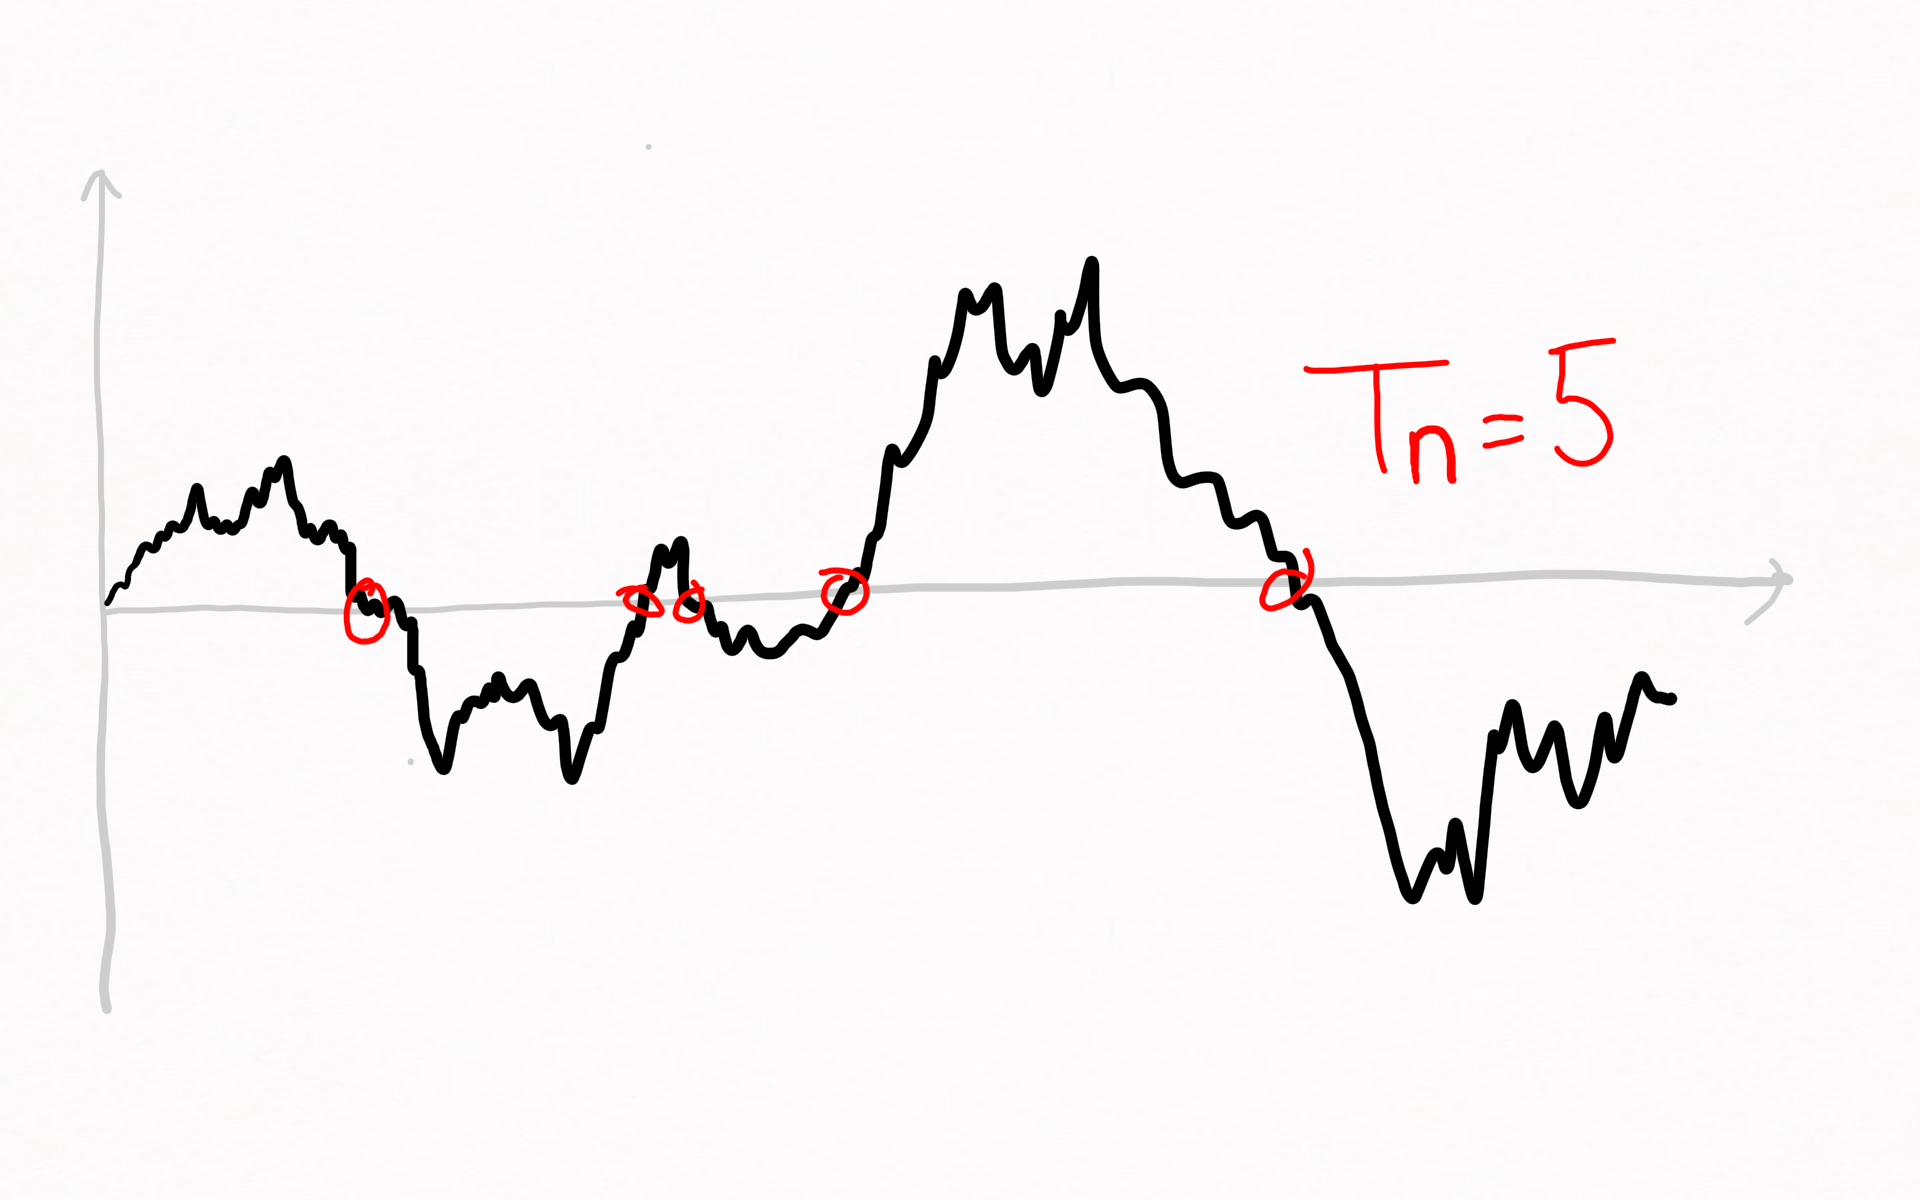

Notice that for $d \geq 3$, $\left\langle T_n \right\rangle$ does **not** grow with $n$, which must mean that the walker somehow "escapes" and never returns back to the origin. The probability of return to the origin is less than 1! For an infinite-length random walk, indeed the probability of returning to the origin $\rho$ is seen to be

$$
\rho \sim \left\{
\begin{array}{ll}
1 & d=1 \\
1 & d=2 \\
<1 & d\geq 3
\end{array}
\right.
$$

The *intuitive* explanation of this amazing fact is that, as the dimension $d$ grows, there are "more directions available", and so more chances for the walker to "get lost" and never return to the origin. There is of course a formal proof as well, but today we will do a **computational verification** of these facts, which is no substitute for a formal proof but is often all we can do!

## Generating Random Walks


### Exercise 3.1
Write a function that generates a random walk of given length in $d$ dimensions. Your random walker should move as follows:

+ At each time-step, the walker moves only in one direction.
+ At each time-step, the walker moves only by -1 or +1

Your function should return a numpy array of shape (`length`, `dim`). Example:
```python
>>> # create a RW of length 10 in dimension 3
>>> traj = get_traj(length=10, dim=3)
>>> # check that the output has the right shape
>>> traj.shape
(10, 3)
```

In [2]:
def get_traj(length=100, dim=2):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW


    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    choices = np.append(np.identity(dim), -np.identity(dim), axis=0)
    indices = np.random.choice(len(choices), size=(length - 1,))
    steps = np.concatenate((np.zeros((1,dim)), np.array([choices[i] for i in indices])), axis = 0)
    traj = np.cumsum(steps, axis=0)
    return traj

### Verification
To make sure that your function works correctly, execute the following cell. Notice the use of `assert` statements: execution should fail if something goes wrong. If everything is fine, nothing should happen.

In [3]:
# basic checks for your RW generator
for dim in range(1, 5):
    for length in [10, 100, 200, 500]:
        traj = get_traj(length=length, dim=dim)
        # make sure traj has the right shape
        assert traj.shape == (length, dim)
        # make sure all steps are -1 or 1 in only one direction
        assert np.all(np.sum(np.diff(traj, axis=0) != 0, axis=1) == np.ones(length - 1))

### Exercise 3.2
Plot a random walk of length $10^4$ for $d=1$ (time in x-axis, position in y-axis) and $d=2$ (x,y components in x,y-axis). Remember to use **axis labels**.

In [4]:
# it is better if you use one cell to generate the random walks, and a second cell to plot them
length = int(1e4)
RW_1d = get_traj(length=length, dim=1)
RW_2d = get_traj(length=length, dim=2)

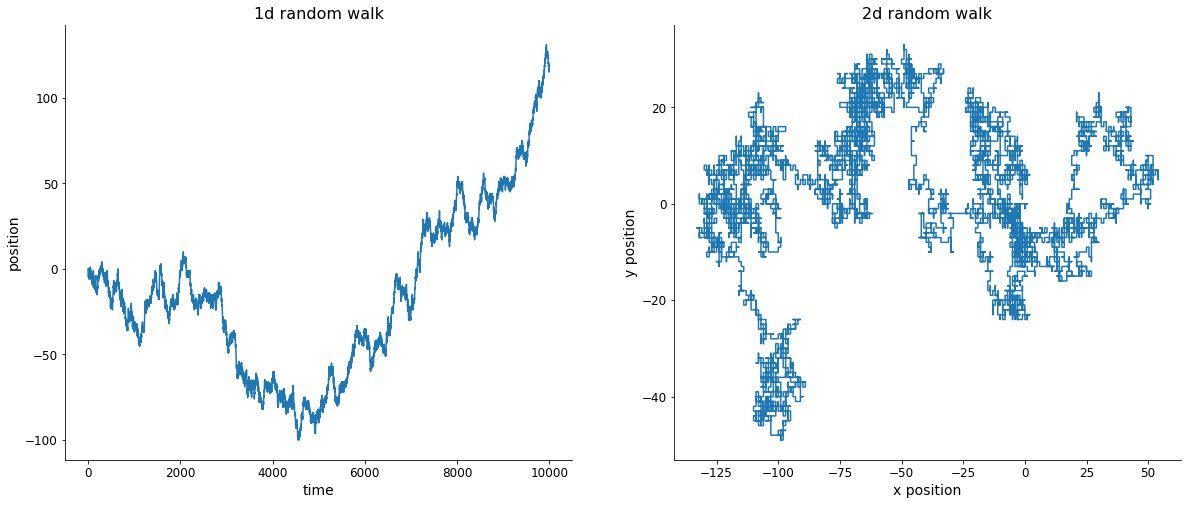

In [5]:
# We generate a figure with two subplots, called axis in matplotlib.
#
# To use the left subplot, we do
# ax1.plot(...)
#
# while to use the right subplot, we do
# ax2.plot(..)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.plot(RW_1d)
ax1.set_xlabel("time"); ax1.set_ylabel("position")
ax1.set_title("1d random walk")
ax2.plot(RW_2d[:, 0], RW_2d[:, 1])
ax2.set_xlabel("x position"); ax2.set_ylabel("y position")
ax2.set_title("2d random walk")
plt.show(fig)

## Counting the number of returns to the origin
Since we are interested in how **the expected number of returns to the origin** scales with the RW length, we don't need to store the whole trajectory of each simulation (we will be performing many simulations!). 

### Exercise 3.3
Write a function that generates a RW of given length and dimension (calling `get_traj`), and returns the number of times it returned to the origin. To count the number of returns to the origin, you might need to use the following functions:
```python
np.all()
np.zeros()
```

In [6]:
def get_num_returns(length, dim):
    # generate a RW of given length and dimension
    traj = get_traj(length, dim)
    # count how many times it goes through the origin
    num_returns_to_origin = np.count_nonzero(np.all(traj == 0, axis=1), axis=0)
    return num_returns_to_origin

### Exercise 3.4
Write a function that computes the expected number of returns to the origin for a given length and dimension. Your function will call `get_num_returns()`, and should have an additional parameter that sets the sample size.

In [7]:
def get_average_num_returns(length, dim, num_trajs=200):
    #average_num_returns
    return np.mean([get_num_returns(length, dim) for _ in range(num_trajs)])

## Comparing with analytical results
We are now ready to compare our analytical results with numerical simulations! We want to plot the expected number of returns to the origin as a function of the RW length. To do this, it is useful to first define an array of RW lengths.

In [8]:
# define range of RW lengths
length_min = 10
length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

(tip: if your RW generating function is not very efficient, you might want to decrease `length_min`)  

Executing the following cell will run all simulations for $d=1$


In [9]:
dim=1
num_trajs=200
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs=num_trajs)
    for length in length_array
])

### Exercise 3.5
Plot the average number of returns to the origin of a 1D RW as a function of the RW length, together with the expected theoretical result. Do your results verify the $n^{1/2}$ scaling? **Tip** Use double-logarithmic scales in your plot. Remember to include label axis, and a legend!

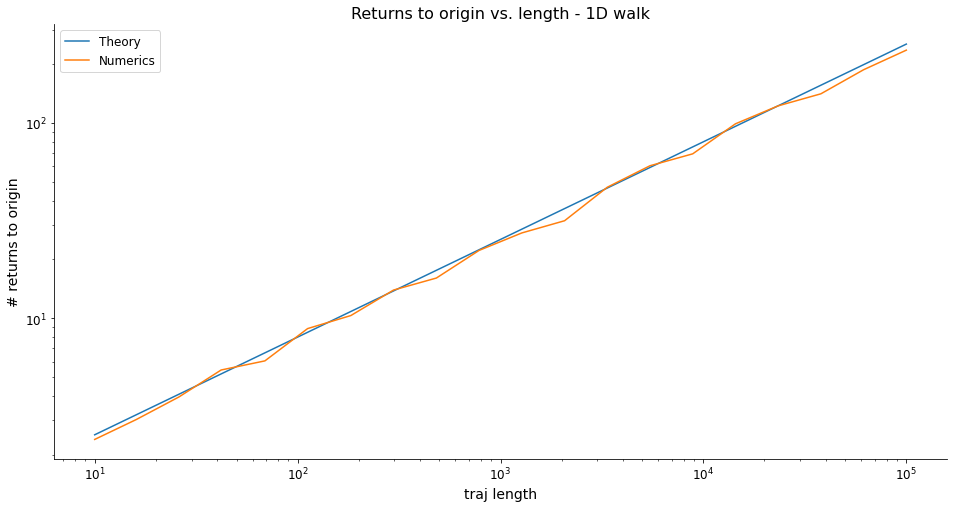

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
# plot theoretical result
a = 0.8
ax.loglog(length_array, a*np.sqrt(length_array), label="Theory")
# plot numerical result
ax.loglog(length_array, num_returns_array, label="Numerics")
# add axis labels
ax.set_xlabel("traj length")
ax.set_ylabel("# returns to origin")
# add a legend
ax.legend()
# add a title (e.g. that says what dimension we used)
ax.set_title("Returns to origin vs. length - 1D walk")
plt.show(fig)

### Exercise 3.6
Plot the average number of returns to the origin of a 2D RW as a function of the RW length. Do your results verify the $log(n)$ scaling? What are the best axis scales to use in this case?

In [11]:
# do the simulations for d=2
dim=2
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs=num_trajs)
    for length in length_array
])

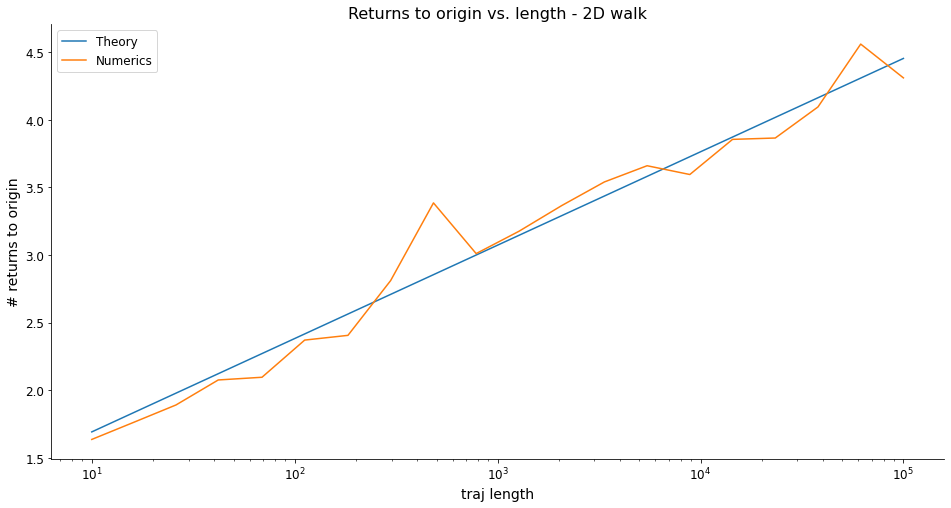

In [12]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
k = 0.30
h = 1
# plot theoretical result
ax.semilogx(length_array, h + k*np.log(length_array), label="Theory")
# plot numerical result
ax.semilogx(length_array, num_returns_array, label="Numerics")
# add axis labels
ax.set_xlabel("traj length")
ax.set_ylabel("# returns to origin")
# add a legend
ax.legend()
# add a title (e.g. that says what dimension we used)
ax.set_title("Returns to origin vs. length - 2D walk")
plt.show(fig)

Notice that we had to put a multiplicative contant to the theoretical model to ease comparison with the numerical result

### Exercise 3.7
Show numerically that, for $d=3$ and $d=4$, the expected number of returns to the origin is **constant**.

In [13]:
# your numerical answer here
# you can use more than one cell of course!
# use markdown cells and code cells if necessary

In [14]:
# do the simulations for d=3
dim=3
num_returns_array_3D = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs=num_trajs)
    for length in length_array
])

In [15]:
# do the simulations for d=3
dim=4
num_returns_array_4D = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs=num_trajs)
    for length in length_array
])

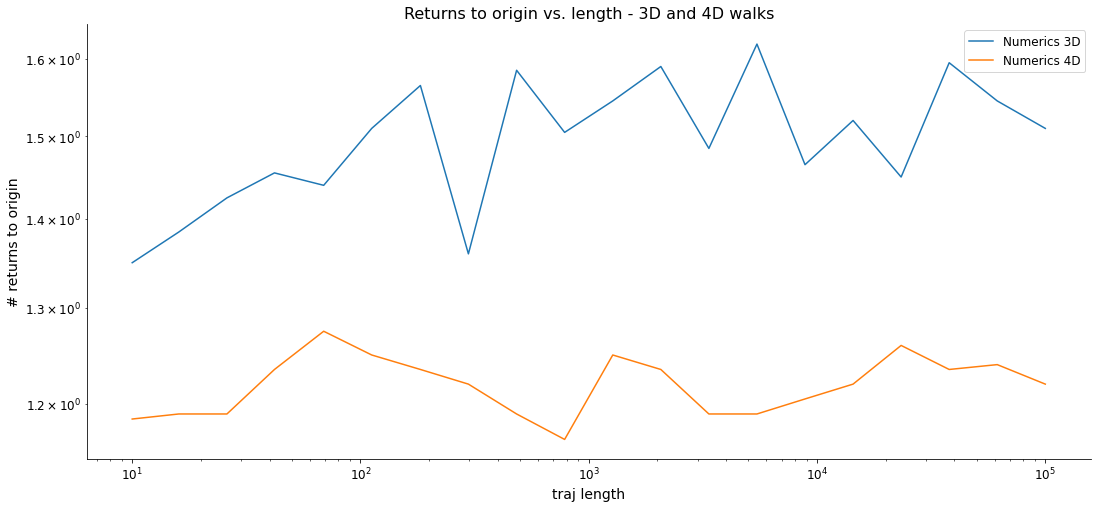

In [16]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
# plot 3D result
ax.loglog(length_array, num_returns_array_3D, label="Numerics 3D")
# plot 4D result
ax.loglog(length_array, num_returns_array_4D, label="Numerics 4D")
# add axis labels
ax.set_xlabel("traj length")
ax.set_ylabel("# returns to origin")
# add a legend
ax.legend()
# add a title (e.g. that says what dimension we used)
ax.set_title("Returns to origin vs. length - 3D and 4D walks")
plt.show(fig)

# Self-Avoiding Walks
Self-avoiding walks (SAW) are simply random walks in a regular lattice with the additional constraint that no point can be visited more than once. That is, SAWs cannot intersect themselves. The most well-known application of SAW is to model linear polymers, where obviously two monomers cannot occupy the same space (excluded volume effect).


You can read more about self-avoiding walks in this nice introduction by Gordon Slade:

[Self-Avoiding Walks, by Gordon Slade](https://www.math.ubc.ca/~slade/intelligencer.pdf)

## Simulating Self-Avoiding Walks
Generating a SAW is not trivial. If you try to generate a SAW stochastically, that is, one step at a time, you will miserably fail: your walker might get into traps (configurations with no allowed movements), and if it does you will have to discard your simulation. It turns out you will have to discard your simulation *really* often, so that for large lengths, you will basically never find a valid path. In addition, the paths you will find for short lengths will not come up with the right probabilities. Bear in mind that we want to **uniformly sample** the set of SAW of given length $n$, SAW($n$). That is, we want that all paths from SAW($n$) are generated with the same probability.

The solution is to use a Monte Carlo algorithm that, given one element $\alpha \in \text{SAW}(n)$, generates a new one $\beta \in \text{SAW}(n)$ with some probability $P_{\alpha \beta}$. If in addition our algorithm satisfies **detailed balance** and is **ergodic**, then we known that it will converge to the equilibrium distribution (the uniform distribution in our case).


## The pivot algorithm
We will implement the pivot algorithm, which is simple, effective, and satisfies detailed balance and ergodicity. You can read about the details of the pivot algorithm here:

[The Pivot Algorithm: A Highly Efficient Monte Carlo Method for the Self-Avoiding Walk](https://link.springer.com/article/10.1007/BF01022990)

(tip: if you're at home, **do not** use tools such as sci-hub to download the paper).

Given a self-avoiding walk of length $n$, the pivot algorithm generates the next walk $\beta \in \text{SAW}(n)$ as follows:

1. **Choose a point of $\alpha$ at random**, splitting the path in two bits: the head (from the origin to the chosen point) and the tail (from the chosen point to the end of the path). Notice that both the head and the tail are SAWs.
2. **Apply a transformation to the tail**, leaving the head intact. The transformation must be an orthoganl transformation that leaves the regular lattice intact (so, either a reflection or a $90º, 180º$ or $270º$ rotation). For simplicity, we will use only **rotations** (read the paper to see why this is ok).
3. **Check if the new path is self-avoiding**. If so, return it. Otherwise, return the original path.

Iterating these steps one obtains a **Markov** chain of SAWs: $\alpha_1 \to \alpha_2 \to \dots \to \alpha_M $. Notice that $\alpha_i$ are not uncorrelated, but because the algorithm satisfies detailed balance and is ergodic, we know that it approaches the equilibrium distribution. This means that we can use our Markov chain to compute **expected values** as long as it is long enough.

## Implementing the pivot step in 2D
To implement the **pivot algorithm** in 2D, we will write one function that does steps 1 and 2, and another function that does step 3. We will also need a function to generate standard 2D random walks.

### Exercise 3.8
Write a function `get_traj` that generates a 2D random walk of given length.

In [17]:
def get_traj(length):
    """Generate a RW in 2 dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.

    Returns
    -------
    traj : np.ndarray, (length, 2)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    choices = np.append(np.identity(2), -np.identity(2), axis=0)
    indices = np.random.choice(len(choices), size=(length - 1,))
    steps = np.concatenate((np.zeros((1,2)), np.array([choices[i] for i in indices])), axis = 0)
    traj = np.cumsum(steps, axis=0)
    return traj

### Exercise 3.9
Write a function `pivot_traj` that, given a 2D random walk, performs steps 1 and 2 of the pivot algorithm. Some useful functions:
```python
np.random.randint()
np.concatenate()
```
You might also want to multiply matrices using the `@` operator:
```python
>>> a = np.array([[1, 2], [3, 4], [5, 6]])
>>> b = np.array([1, 1])
>>> a @ b
array([ 3,  7, 11])
```


In [18]:
def rotation_matrix(direction):
    """Return a 2D matrix that rotates 90°, 180° or 270°"""
    assert direction in [0, 1, 2]
    if direction == 0:
        return [[ 0,  1],
                [-1,  0]]
    elif direction == 1:
        return [[-1,  0],
                [ 0, -1]]
    elif direction == 2:
        return [[ 0, -1],
                [ 1,  0]]

In [19]:
def pivot_traj(traj):
    pivot = np.random.randint(1, len(traj)-1)
    head, tail = np.split(np.copy(traj), [pivot])
    tail -= head[-1]
    tail = tail @ rotation_matrix(np.random.choice([0,1,2]))
    tail += head[-1]
    return np.concatenate((head, tail), axis = 0)

### Exercise 3.10
Write a function that counts the number of self-intersections of a RW. Notice that SAWs have 0 self intersections, so that will solve step 3 of the pivot algorithm, but will also be useful to generate the initial condition. One way of approaching this exercise is to count how many *different* points the path visits.

In [20]:
def count_self_intersections(traj):
    """Count the number of self-intersections of a RW"""
    return len(traj)-len(np.unique(traj, axis=0))

### Exercise 3.11
Verify that your `count_self_intersecitons` function works properly by using short trajectories for which you know the answer.

In [21]:
# your verifications here

In [22]:
traj = np.array([[0., 0.],
          [0., 1.],
          [1., 1.], #
          [1., 2.], #
          [2., 2.], #
          [1., 2.], # 1st intersection
          [1., 1.], # 2nd intersection
          [2., 1.],
          [2., 2.], # 3rd intersection
          [3., 2.], #
          [3., 1.],
          [3., 2.], # 4th intersection
          [3., 3.], #
          [2., 3.], #
          [1., 3.], #
          [1., 2.], # 5th intersection
          [1., 3.], # 6th intersection
          [2., 3.], # 7th intersection
          [3., 3.], # 8th intersection
          [3., 2.], # 9th intersection
          [4., 2.]]);

We can count 9 intersections in the trajectory above

In [23]:
count_self_intersections(traj)

9

The verification is thus complete.

## Generating the initial condition
You might have noticed that the pivot algorithm requires an element of SAW($n$) as starting condition, to then generate a Markov chain easily. But how do you get this first element? We will use the following strategy:
1. Generate a standard 2D random walk, and count the number of self intersections.
2. Apply the pivot transformation to get a new 2D random walk, and count the number of self-intersections-
3. If the number of self-intersections has decreased or not changed, keep the new path. Else, keep the old one.
4. Go to 2, till the number of self-intersections is 0.

### Exercise 3.12
Write a function `get_first_SAW` that generates a SAW of given length

In [24]:
def get_first_SAW(length, max_tries=1_000_000):
    traj = get_traj(length)
    traj_inter = count_self_intersections(traj)
    for _ in range(max_tries):
        if traj_inter == 0:
            return traj
        candidate = pivot_traj(traj)
        candidate_inter = count_self_intersections(candidate)
        if candidate_inter <= traj_inter:
            traj = candidate
            # if candidate_inter < traj_inter: # This is just to have an indicator of progress
            #    print(candidate_inter)
            traj_inter = candidate_inter

    raise Exception(f"No SAW found after {max_tries} tries")

### Exercise 3.13
Generate and plot some 2D SAWs of different lengths. Be carefull, raise the length slowly! You can measure how long a cell takes executing using the `%%time` magic at the top of a cell.

CAUTION!!! Some of the generated RW may have configurations such that it is unlikely that they will be pivoted into a SAW within `max_tries` attempts. In such cases trying again may lead to success, in particular with shorter walks.

In [25]:
# your answer here
# use more than one cell!

In [26]:
%%time
SAW05 = get_first_SAW(5)

CPU times: user 0 ns, sys: 895 µs, total: 895 µs
Wall time: 753 µs


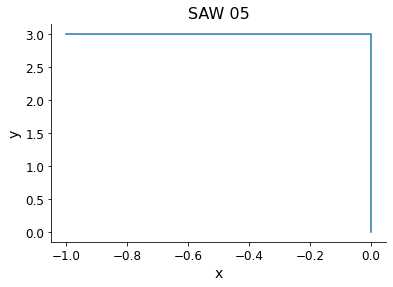

In [27]:
plt.plot(SAW05[:, 0], SAW05[:,1])
plt.xlabel("x"); plt.ylabel("y")
plt.title("SAW 05")
plt.show()

In [28]:
%%time
SAW10 = get_first_SAW(10)

CPU times: user 4.17 ms, sys: 3.72 ms, total: 7.89 ms
Wall time: 6.52 ms


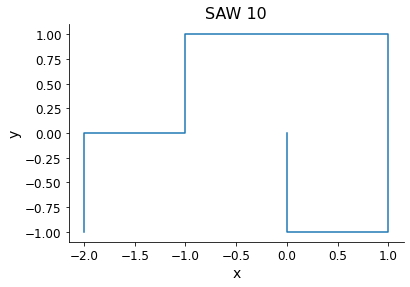

In [29]:
plt.plot(SAW10[:, 0], SAW10[:,1])
plt.xlabel("x"); plt.ylabel("y")
plt.title("SAW 10")
plt.show()

In [30]:
%%time
SAW100 = get_first_SAW(100)

CPU times: user 250 ms, sys: 4.14 ms, total: 254 ms
Wall time: 249 ms


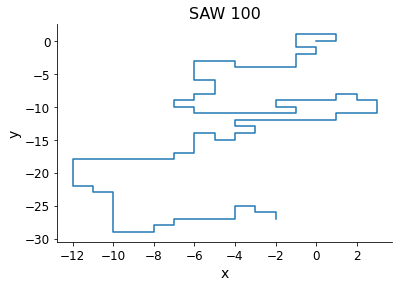

In [31]:
plt.plot(SAW100[:, 0], SAW100[:,1])
plt.xlabel("x"); plt.ylabel("y")
plt.title("SAW 100")
plt.show()

In [34]:
%%time
SAW200 = get_first_SAW(200)

CPU times: user 333 ms, sys: 40.6 ms, total: 374 ms
Wall time: 348 ms


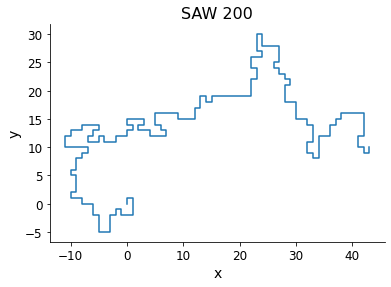

In [35]:
plt.plot(SAW200[:, 0], SAW200[:,1])
plt.xlabel("x"); plt.ylabel("y")
plt.title("SAW 200")
plt.show()

In [37]:
%%time
SAW300 = get_first_SAW(300)

CPU times: user 887 ms, sys: 189 µs, total: 887 ms
Wall time: 889 ms


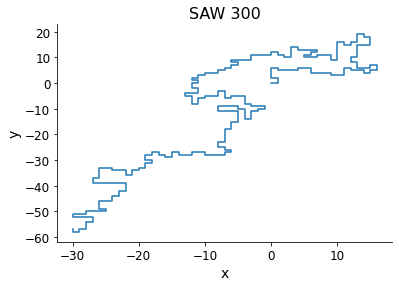

In [38]:
plt.plot(SAW300[:, 0], SAW300[:,1])
plt.xlabel("x"); plt.ylabel("y")
plt.title("SAW 300")
plt.show()

In [41]:
%%time
SAW500 = get_first_SAW(500)

CPU times: user 2.5 s, sys: 24 µs, total: 2.5 s
Wall time: 2.49 s


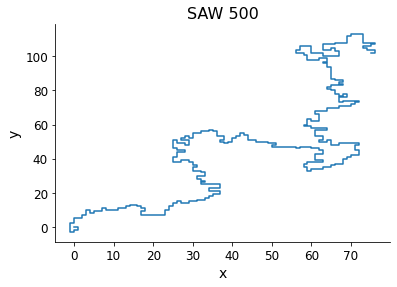

In [42]:
plt.plot(SAW500[:, 0], SAW500[:,1])
plt.xlabel("x"); plt.ylabel("y")
plt.title("SAW 500")
plt.show()

### Exercise 3.14
Write a function `get_next_SAW` that, given a SAW, generates another SAW using the pivot algorithm. Your function should check that the input RW is really a SAW. Remember the steps:

1. Apply the pivot transformation
2. Check if the new path is self-avoiding. **If so, return it. Otherwise, return the original path.**

In [43]:
def get_next_SAW(traj):
    # make sure input traj is SAW
    assert count_self_intersections(traj) == 0
    
    # pivot step
    proposed_traj = pivot_traj(traj)
    
    # count intersections
    num_intersections = count_self_intersections(proposed_traj)
    
    # if it's a SAW
    if num_intersections == 0:
        return proposed_traj
    
    # if not
    else:
        return traj

### Mean Squared Displacement in SAW
A quantity of interest in RWs is the mean squared displacement, which is simply the (squared) distance between the endpoints of the walk. Usually, one writes

$$
\left\langle X(n)^2 \right\rangle \sim n^{2 \nu}
$$

As you know, for a standard RW of $n$ steps, the mean-squared displacement scales like $n$, so $\nu=1/2$. However, the exponent for SAW is **different**! Althought it has not been formally proven (still), it is believed that the exponent for SAW is $\nu=3/4$. That is, for a self-avoiding random walk, the mean squared displacement scales as $n^{3/2}$.

### Exercise 3.15
Explain why it makes sense that the mean-squared displacement exponent of SAW is **greater** than that of standard RW. 

#### Explanation
The thesis is sensible since we expect the self-avoidance constraint to act as a repulsor from the points already visited, thus increasing displacement proportionally to the number of already visited points.

A more quantitative approach might be to consider the tightest (i.e. least displaced) and loosest (i.e. most displaced) walks and see what they tell us about the lower and upper limits of the scale relation between displacement and walk length. 

Let us assume that exists a SAW that completely fills all $n$ lattice points enclosed within a certain distance $R$ from the origin: for sufficiently high $n$ the number of lattice points in $n \propto R^2$, therefore $R \propto n^{1/2}$. Since we also know that, for an isotropic distribution in a finite space of radius $R$ the mean-squared displacement is $\left\langle X(n)^2 \right\rangle \propto R^2$, then:
$$
\left\langle X(n)^2 \right\rangle \propto n
$$
which implies $\nu > \frac{1}{2}$, since space-filling walks are a lower bound case for displacement.

Then we consider the most displaced SAW: a straight walk. It is easy to calculate that in this case
$$
\left\langle X(n)^2 \right\rangle \propto n^2
$$
which implies that $\nu < 1$ since straight walks are an upper bound case for displacement.

Therefore we have demonstrated that 
$$
\nu \in \left(1/2,1\right)
$$

### Exercise 3.16
Verify numerically the scaling of the mean-squared displacement of SAW. Notice that you don't need to store all the SAWs, just the endpoints. You could follow this scheme:

1. Generate a first SAW with your `get_first_SAW()` function
2. Generate the next SAW using your `get_next_SAW()` function, and store the endpoint.
3. Iterate step 2 for as many steps as required
4. Compute the average mean-squared displacement of the stored endpoints

Then repeating steps 1-4 for different lengths, and plot the results in double-logarithmic axis. Compare your results with the theoretical exponent. Do they agree?

In [44]:
def get_average_displacement(N, steps=1000):
    SAW = get_first_SAW(N)
    sq_displacements = np.empty((steps,))
    sq_displacements[0] = np.linalg.norm(SAW[-1])**2
    for i in range(1, steps):
        SAW = get_next_SAW(SAW)
        sq_displacements[i] = np.linalg.norm(SAW[-1])**2
    return np.mean(sq_displacements)        

In [45]:
length_min = 5
length_max = 500

length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=5)
])

In [50]:
%%time
average_displacement_array = [get_average_displacement(length, 100) for length in length_array]

CPU times: user 3.04 s, sys: 16.1 ms, total: 3.06 s
Wall time: 3.04 s


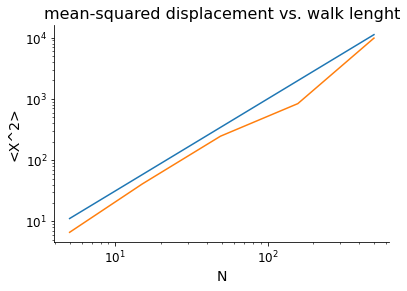

In [52]:
fig, ax = plt.subplots(1,1);
ax.loglog(length_array, length_array**(3/2), label="theoretical")
ax.loglog(length_array, average_displacement_array, label="numeric")
ax.set_xlabel("N"); ax.set_ylabel("<X^2>")
ax.set_title("mean-squared displacement vs. walk lenght")
plt.show(fig)